<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#!pip install yfinance
#!pip install finta
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

# 載入資料

In [13]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import seaborn as sns
yf.pdr_override()
y_symbols = ["^TWII"]
from datetime import datetime
startdate = datetime(2010,12,1)
enddate = datetime(2022,12,30)
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)
print(df.shape)
display(df.head(3))
display(df.tail(3))

[*********************100%***********************]  1 of 1 completed
(2956, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-01,8430.599609,8520.110352,8428.639648,8520.110352,8520.078125,4202800
2010-12-02,8598.009766,8641.129883,8572.650391,8585.769531,8585.737305,4731800
2010-12-03,8630.879883,8659.620117,8618.259766,8624.009766,8623.977539,3710800


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200


# Label triple_barrier

In [14]:
import numpy as np
import math
'''
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

ret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']
df = df.join(ret)
'''

"\ndef triple_barrier(price, ub, lb, max_period):\n\n    def end_price(s):\n        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]\n    \n    r = np.array(range(max_period))\n    \n    def end_time(s):\n        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]\n\n    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)\n    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)\n    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') \n                   for i, k in enumerate(t)], index=t.index).dropna()\n\n    signal = pd.Series(0, p.index)\n    signal.loc[p > ub] = 1\n    signal.loc[p < lb] = -1\n    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})\n\n    return ret\n\nret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']\ndf = df.join(ret)\n"

In [15]:
import pandas as pd
import numpy as np

def triple_barrier(price, ub, lb, max_period):
    def end_price(s):
        end = s.iloc[-1]
        for i in r:
            if s.iloc[i] >= ub:
                end = s.iloc[i]
                break
            elif s.iloc[i] <= lb:
                end = s.iloc[i]
                break
        return end / s.iloc[0]

    def end_time(s):
        for i in r:
            if s.iloc[i] >= ub or s.iloc[i] <= lb:
                return i
        return max_period - 1

    r = np.arange(max_period)
    signals = pd.DataFrame(index=price.index)
    signals['triple_barrier_signal'] = 0
    signals['end_time'] = 0
    signals['end_price'] = 0.0

    for i in range(max_period, len(price)):
        window = price.iloc[i-max_period:i]
        signals.loc[window.index[-1], 'triple_barrier_signal'] = np.sign(window.iloc[-1] - window.iloc[0])
        signals.loc[window.index[-1], 'end_time'] = end_time(window)
        signals.loc[window.index[-1], 'end_price'] = end_price(window)

    return signals
ret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']
df = df.join(ret)


In [16]:
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal
Date,,,,,,,
2022-12-02,14933.200195,15021.730469,14921.059570,14970.679688,14970.679688,2999500,1
2022-12-05,14972.169922,15088.059570,14969.969727,14980.740234,14980.740234,3216700,1
2022-12-06,14955.290039,14957.820312,14728.879883,14728.879883,14728.879883,3221700,1
2022-12-07,14708.080078,14823.150391,14630.009766,14630.009766,14630.009766,3266900,1
2022-12-08,14631.209961,14634.160156,14464.200195,14553.040039,14553.040039,2428500,1
2022-12-09,14620.269531,14742.790039,14620.269531,14705.429688,14705.429688,2543200,1
2022-12-12,14658.459961,14658.459961,14538.660156,14612.589844,14612.589844,2221600,1
2022-12-13,14617.860352,14658.700195,14515.740234,14522.959961,14522.959961,2730600,-1
2022-12-14,14557.559570,14739.360352,14557.559570,14739.360352,14739.360352,2640200,1


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='triple_barrier_signal', ylabel='count'>

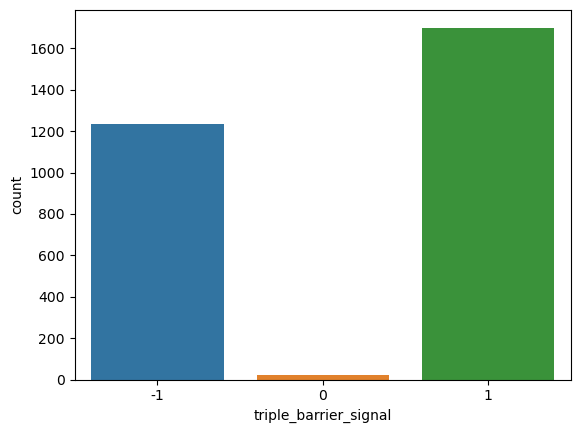

In [17]:
df['triple_barrier_signal'].value_counts()
sns.countplot(df['triple_barrier_signal'])

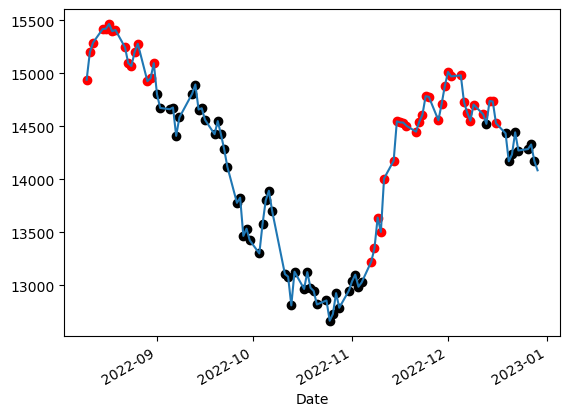

In [18]:
import matplotlib.pyplot as plt

df_recent = df.tail(100)
buy = df_recent[df_recent['triple_barrier_signal']==1]['Close']
sell = df_recent[df_recent['triple_barrier_signal']==-1]['Close']
df_recent['Close'].plot()#後20筆是前20筆的驗證
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')
plt.show()

# 建立ohlcv

In [19]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

count    2955.000000
mean       53.137118
std        12.640483
min         9.948198
25%        44.281521
50%        53.968994
75%        61.866165
max       100.000000
Name: RSI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI
Date,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564


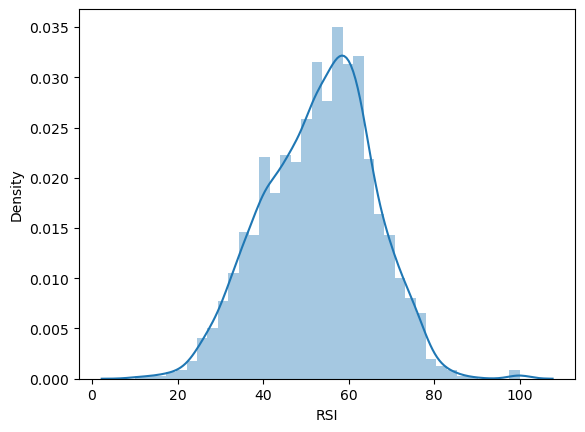

In [20]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count    2943.000000
mean      -41.662274
std        31.751251
min      -100.000000
25%       -70.149882
50%       -36.050992
75%       -12.463083
max        -0.000000
Name: Williams %R, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R
Date,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095


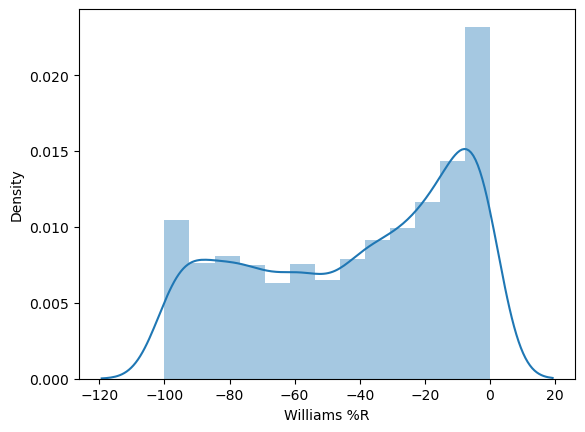

In [21]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count     2916.000000
mean     10524.896328
std       2937.919053
min       7003.694133
25%       8436.516661
50%       9598.795005
75%      10919.193598
max      18134.302258
Name: SMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Date,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760


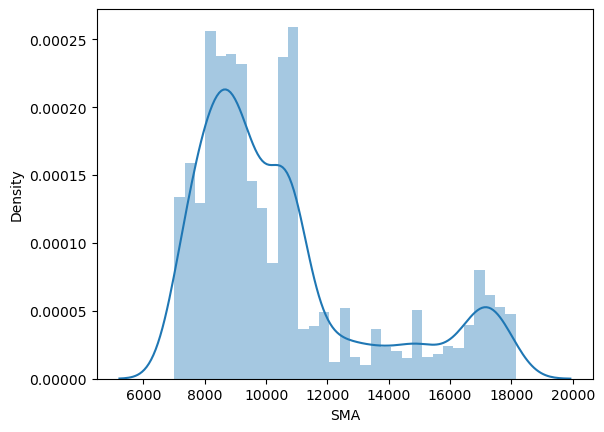

In [22]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count     2956.000000
mean     10532.279899
std       2947.437516
min       6806.511665
25%       8477.429983
50%       9593.495346
75%      11097.464657
max      18370.191557
Name: EMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,14422.549594
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,14395.065652
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,14381.738459
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,14340.010689
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,14289.012458


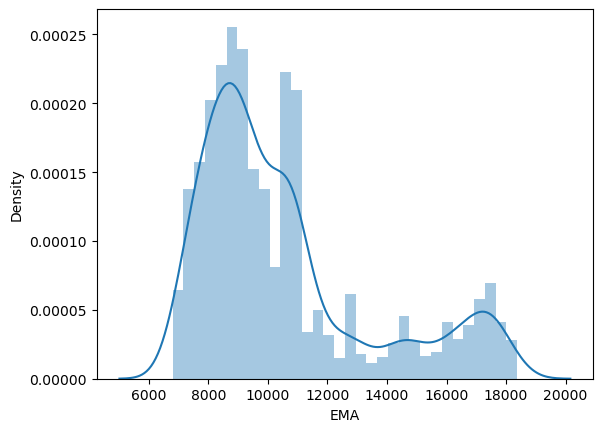

In [23]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count     2948.000000
mean     10540.067883
std       2952.888218
min       6776.183974
25%       8464.168528
50%       9594.729156
75%      11134.886306
max      18389.146615
Name: WMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,14422.549594,14380.756619
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,14395.065652,14347.175456
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,14381.738459,14327.539366
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,14340.010689,14285.969054
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,14289.012458,14239.250065


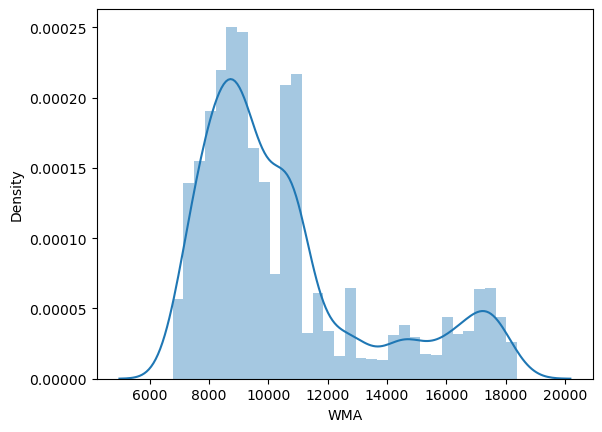

In [24]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count     2938.000000
mean     10549.955689
std       2962.549735
min       6715.396428
25%       8454.202455
50%       9594.621054
75%      11187.821174
max      18487.953184
Name: HMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,14422.549594,14380.756619,14288.679091
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,14395.065652,14347.175456,14250.566366
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,14381.738459,14327.539366,14229.197440
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,14340.010689,14285.969054,14202.532302
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,14289.012458,14239.250065,14168.873358


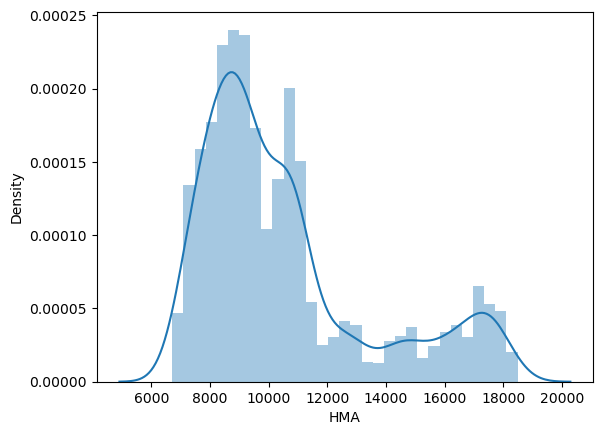

In [25]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count     2956.000000
mean     10540.018412
std       2955.894227
min       6661.102660
25%       8474.576061
50%       9573.243929
75%      11161.574852
max      18516.770956
Name: TEMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,14422.549594,14380.756619,14288.679091,14241.219402
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,14395.065652,14347.175456,14250.566366,14229.110107
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,14381.738459,14327.539366,14229.197440,14248.249199
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,14340.010689,14285.969054,14202.532302,14189.610240
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,14289.012458,14239.250065,14168.873358,14113.778957


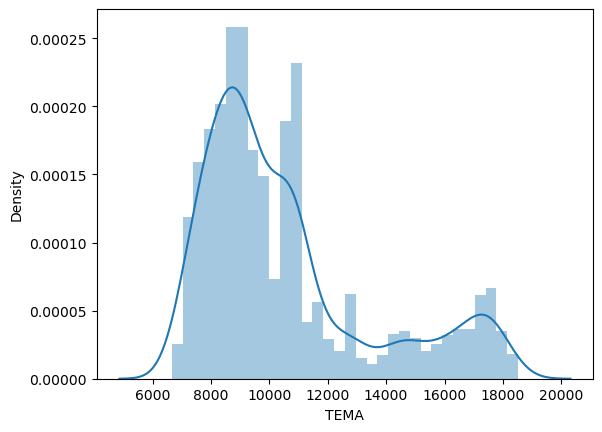

In [26]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    2955.000000
mean       17.300660
std       112.523190
min      -367.416775
25%       -68.213730
50%        38.357133
75%       101.535562
max       347.439300
Name: CCI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,14422.549594,14380.756619,14288.679091,14241.219402,-132.612460
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,14395.065652,14347.175456,14250.566366,14229.110107,-111.692107
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,14381.738459,14327.539366,14229.197440,14248.249199,-78.706495
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,14340.010689,14285.969054,14202.532302,14189.610240,-118.728947
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,14289.012458,14239.250065,14168.873358,14113.778957,-140.508297


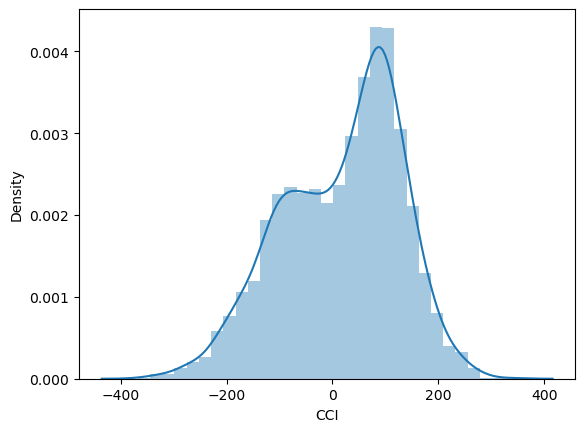

In [27]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    2955.000000
mean        6.791285
std        29.709029
min       -86.464212
25%       -14.007011
50%         9.650070
75%        27.592241
max       100.000000
Name: CMO, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,14422.549594,14380.756619,14288.679091,14241.219402,-132.612460,-15.510993
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,14395.065652,14347.175456,14250.566366,14229.110107,-111.692107,-14.287282
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,14381.738459,14327.539366,14229.197440,14248.249199,-78.706495,-10.129432
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,14340.010689,14285.969054,14202.532302,14189.610240,-118.728947,-21.511108
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,14289.012458,14239.250065,14168.873358,14113.778957,-140.508297,-27.311212


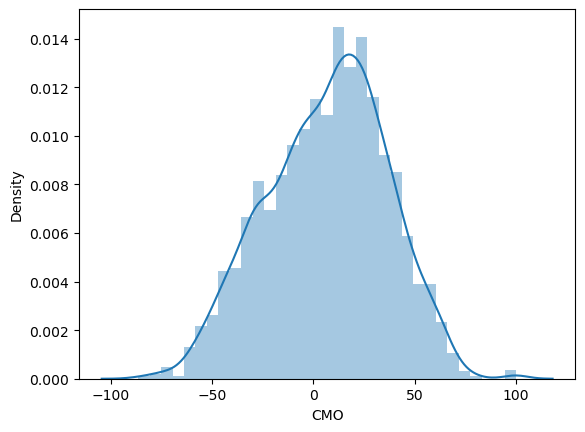

In [28]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    2956.000000
mean        0.051594
std        39.470854
min      -244.072759
25%       -19.664795
50%         0.506288
75%        20.444737
max       214.802204
Name: MACD, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,14422.549594,14380.756619,14288.679091,14241.219402,-132.612460,-15.510993,-89.761713
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,14395.065652,14347.175456,14250.566366,14229.110107,-111.692107,-14.287282,-84.627877
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,14381.738459,14327.539366,14229.197440,14248.249199,-78.706495,-10.129432,-75.123966
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,14340.010689,14285.969054,14202.532302,14189.610240,-118.728947,-21.511108,-75.884061
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,14289.012458,14239.250065,14168.873358,14113.778957,-140.508297,-27.311212,-78.572898


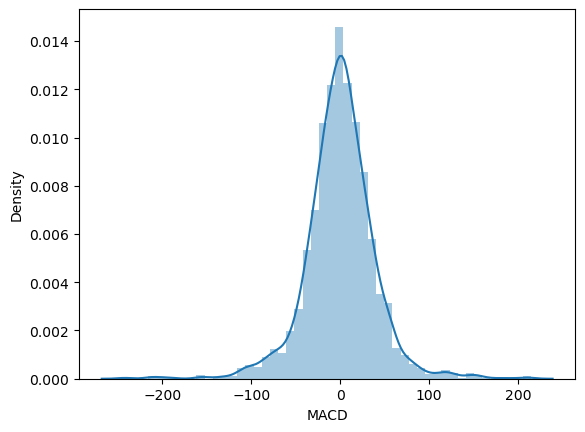

In [29]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    2956.000000
mean        0.000329
std         0.351476
min        -2.355901
25%        -0.206008
50%         0.000733
75%         0.202674
max         1.592874
Name: PPO, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,14422.549594,14380.756619,14288.679091,14241.219402,-132.612460,-15.510993,-89.761713,-0.623502
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,14395.065652,14347.175456,14250.566366,14229.110107,-111.692107,-14.287282,-84.627877,-0.587603
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,14381.738459,14327.539366,14229.197440,14248.249199,-78.706495,-10.129432,-75.123966,-0.521553
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,14340.010689,14285.969054,14202.532302,14189.610240,-118.728947,-21.511108,-75.884061,-0.526887
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,14289.012458,14239.250065,14168.873358,14113.778957,-140.508297,-27.311212,-78.572898,-0.545969


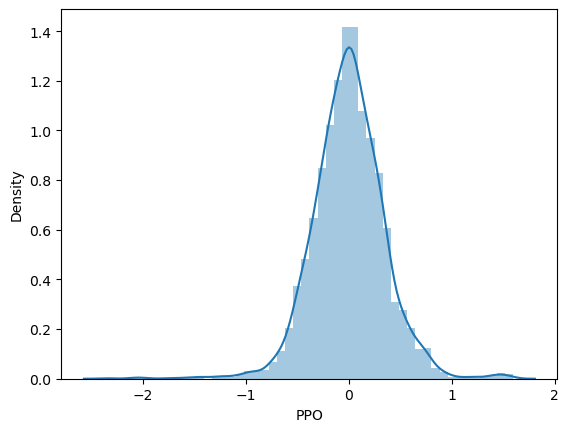

In [30]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    2944.000000
mean        0.268001
std         3.521910
min       -23.361982
25%        -1.686606
50%         0.581121
75%         2.489550
max        16.773101
Name: ROC, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,14422.549594,14380.756619,14288.679091,14241.219402,-132.612460,-15.510993,-89.761713,-0.623502,-2.449622
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,14395.065652,14347.175456,14250.566366,14229.110107,-111.692107,-14.287282,-84.627877,-0.587603,-1.840922
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,14381.738459,14327.539366,14229.197440,14248.249199,-78.706495,-10.129432,-75.123966,-0.521553,-2.563679
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,14340.010689,14285.969054,14202.532302,14189.610240,-118.728947,-21.511108,-75.884061,-0.526887,-3.007614
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,14289.012458,14239.250065,14168.873358,14113.778957,-140.508297,-27.311212,-78.572898,-0.545969,-3.015504


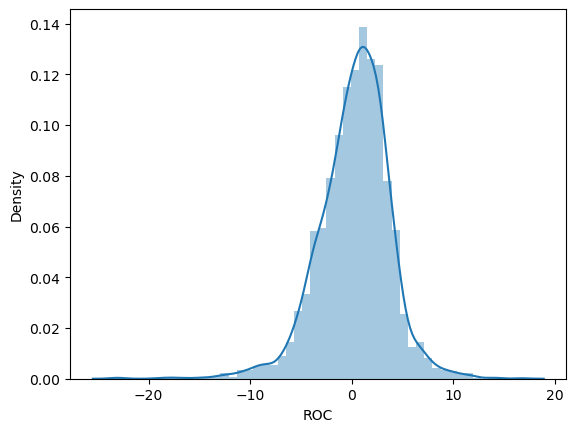

In [31]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    2.947000e+03
mean     2.454245e+09
std      5.378975e+09
min     -6.487266e+09
25%     -3.773580e+08
50%      1.475980e+09
75%      3.405908e+09
max      2.656728e+10
Name: CFI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,14422.549594,14380.756619,14288.679091,14241.219402,-132.612460,-15.510993,-89.761713,-0.623502,-2.449622,8.863495e+08
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,14395.065652,14347.175456,14250.566366,14229.110107,-111.692107,-14.287282,-84.627877,-0.587603,-1.840922,8.027945e+08
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,14381.738459,14327.539366,14229.197440,14248.249199,-78.706495,-10.129432,-75.123966,-0.521553,-2.563679,7.487683e+08
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,14340.010689,14285.969054,14202.532302,14189.610240,-118.728947,-21.511108,-75.884061,-0.526887,-3.007614,6.492421e+08
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,14289.012458,14239.250065,14168.873358,14113.778957,-140.508297,-27.311212,-78.572898,-0.545969,-3.015504,5.383576e+08


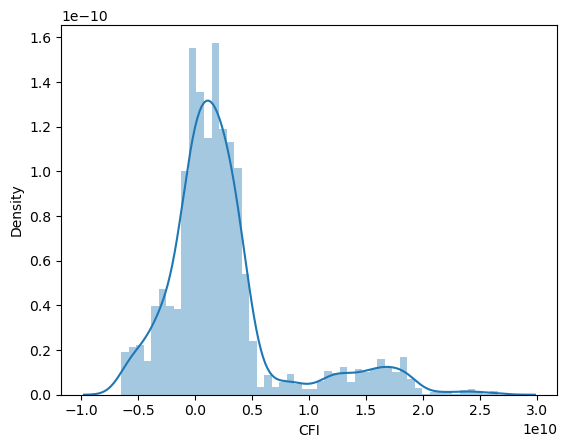

In [32]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count    2943.000000
mean       -0.926170
std        17.425795
min      -102.667887
25%       -12.528717
50%         0.338669
75%        10.886771
max        46.931640
Name: DMI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,...,14380.756619,14288.679091,14241.219402,-132.612460,-15.510993,-89.761713,-0.623502,-2.449622,8.863495e+08,-9.378238
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,...,14347.175456,14250.566366,14229.110107,-111.692107,-14.287282,-84.627877,-0.587603,-1.840922,8.027945e+08,-8.708364
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,...,14327.539366,14229.197440,14248.249199,-78.706495,-10.129432,-75.123966,-0.521553,-2.563679,7.487683e+08,-3.619606
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,...,14285.969054,14202.532302,14189.610240,-118.728947,-21.511108,-75.884061,-0.526887,-3.007614,6.492421e+08,-11.051007
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,...,14239.250065,14168.873358,14113.778957,-140.508297,-27.311212,-78.572898,-0.545969,-3.015504,5.383576e+08,-15.803782


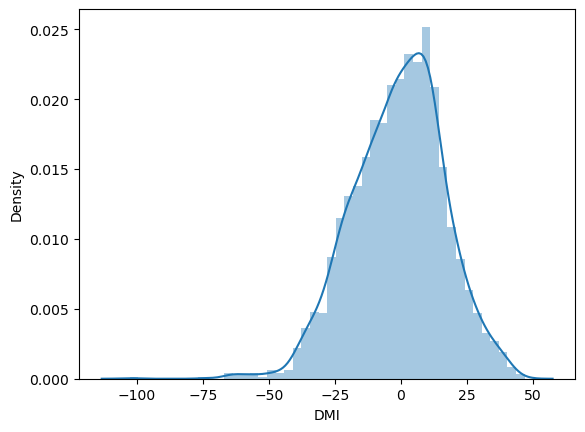

In [33]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count     2956.000000
mean     10501.806581
std       2948.288495
min       6609.109863
25%       8452.544002
50%       9536.863112
75%      11138.030273
max      18619.609375
Name: SAR, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.120117,14318.120117,14192.980469,14271.629883,14271.629883,1979800,-1,45.932512,-85.792026,14231.449957,...,14288.679091,14241.219402,-132.612460,-15.510993,-89.761713,-0.623502,-2.449622,8.863495e+08,-9.378238,14731.254582
2022-12-26,14271.200195,14301.110352,14253.200195,14285.129883,14285.129883,1574600,-1,46.336205,-80.885859,14267.955078,...,14250.566366,14229.110107,-111.692107,-14.287282,-84.627877,-0.587603,-1.840922,8.027945e+08,-8.708364,14673.928147
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100,-1,47.685401,-71.516978,14301.581412,...,14229.197440,14248.249199,-78.706495,-10.129432,-75.123966,-0.521553,-2.563679,7.487683e+08,-3.619606,14622.334356
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900,-1,43.463813,-91.555252,14329.286038,...,14202.532302,14189.610240,-118.728947,-21.511108,-75.884061,-0.526887,-3.007614,6.492421e+08,-11.051007,14575.899943
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200,0,41.234564,-86.655095,14353.306760,...,14168.873358,14113.778957,-140.508297,-27.311212,-78.572898,-0.545969,-3.015504,5.383576e+08,-15.803782,14521.107927


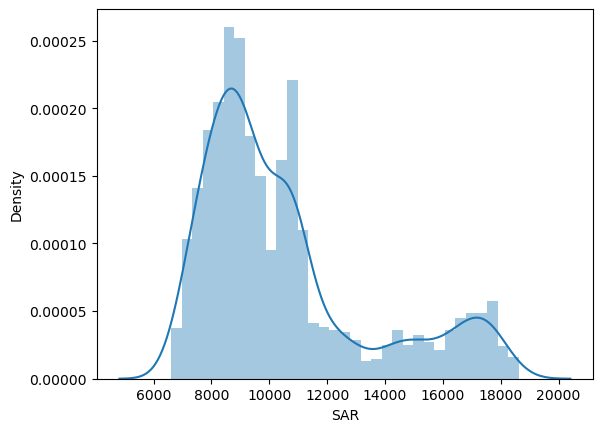

In [34]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [35]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = ['RSI','Williams %R','SMA','EMA','WMA','HMA','TEMA','CCI','CMO','MACD','PPO','ROC','CFI','DMI','SAR']
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(2956, 22)
(2916, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-12-23,45.932512,-85.792026,14231.449957,14422.549594,14380.756619,14288.679091,14241.219402,-132.612460,-15.510993,-89.761713,-0.623502,-2.449622,8.863495e+08,-9.378238,14731.254582,-1
2022-12-26,46.336205,-80.885859,14267.955078,14395.065652,14347.175456,14250.566366,14229.110107,-111.692107,-14.287282,-84.627877,-0.587603,-1.840922,8.027945e+08,-8.708364,14673.928147,-1
2022-12-27,47.685401,-71.516978,14301.581412,14381.738459,14327.539366,14229.197440,14248.249199,-78.706495,-10.129432,-75.123966,-0.521553,-2.563679,7.487683e+08,-3.619606,14622.334356,-1
2022-12-28,43.463813,-91.555252,14329.286038,14340.010689,14285.969054,14202.532302,14189.610240,-118.728947,-21.511108,-75.884061,-0.526887,-3.007614,6.492421e+08,-11.051007,14575.899943,-1
2022-12-29,41.234564,-86.655095,14353.306760,14289.012458,14239.250065,14168.873358,14113.778957,-140.508297,-27.311212,-78.572898,-0.545969,-3.015504,5.383576e+08,-15.803782,14521.107927,0


# features scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
import pickle
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features] = min_max_scaler.fit_transform(df_minmax[features])#縮放到0-1之間
with open('scaler.pkl', 'wb') as f:
    pickle.dump(min_max_scaler, f)
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-12-23,0.484429,0.142080,0.649359,0.658617,0.654835,0.643300,0.639366,0.328464,0.430331,0.336281,0.438718,0.521049,0.223074,0.532298,0.676254,-1
2022-12-26,0.489863,0.191141,0.652638,0.656240,0.651943,0.640062,0.638345,0.357729,0.437752,0.347469,0.447809,0.536216,0.220546,0.537862,0.671481,-1
2022-12-27,0.508027,0.284830,0.655659,0.655088,0.650252,0.638247,0.639959,0.403872,0.462970,0.368180,0.464536,0.518208,0.218912,0.580128,0.667185,-1
2022-12-28,0.451195,0.084447,0.658148,0.651479,0.646673,0.635982,0.635013,0.347885,0.393940,0.366524,0.463185,0.507147,0.215901,0.518404,0.663319,-1
2022-12-29,0.421184,0.133449,0.660306,0.647069,0.642650,0.633123,0.628617,0.317418,0.358762,0.360664,0.458353,0.506950,0.212546,0.478928,0.658757,0


In [37]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# Xs ,ys prepare

In [38]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 2902/2902 [00:03<00:00, 894.90it/s]

準備完成


# check

In [39]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 2902
第一筆的index開始和結束:2011-01-26-2011-02-23
最後一筆的index開始和結束:2022-12-09-2022-12-29


# Reshape X

(圖片數量,長,寬,1張)

In [40]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(2902, 15, 15)
(2902, 15, 15, 1)


# One hot encoding of label

原始y代表漲幅

In [41]:
print(ys.shape)
print(ys[:5])

from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print(ys.shape)
print(ys[:5])

(2902, 1)
[[-1]
 [-1]
 [-1]
 [-1]
 [-1]]
(2902, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


# Visualization

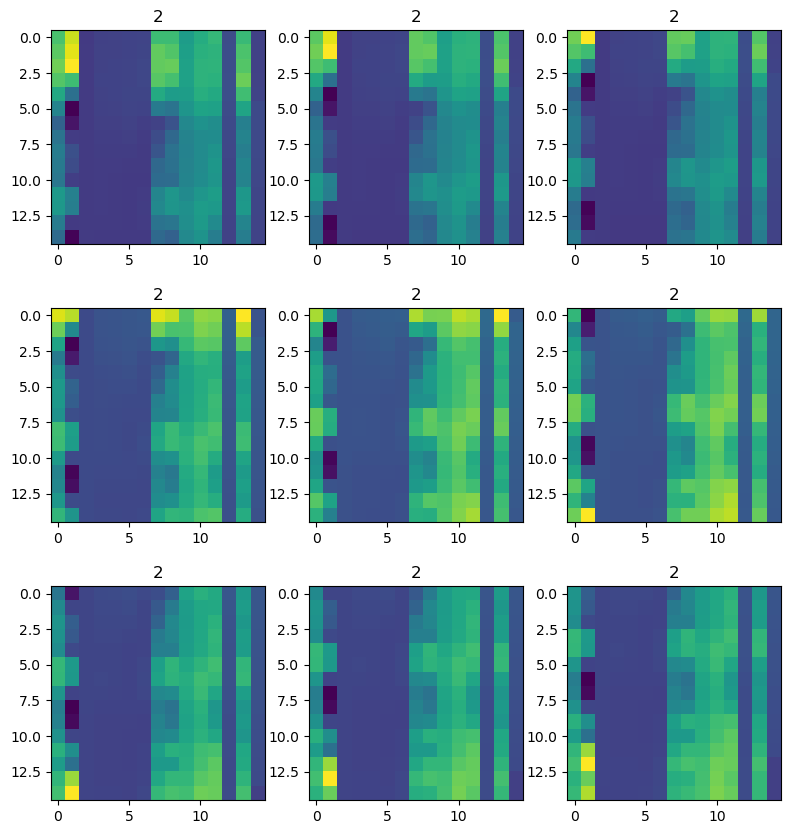

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and test sets

In [43]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(2862, 15, 15, 1) (2862, 3) (40, 15, 15, 1)


# 調整採樣

In [44]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(2862, 225)
(2862,)
1    1217
2    1217
Name: 0, dtype: int64
(2434, 15, 15, 1)
(2434, 3)


# Split training and val sets

In [45]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train, 
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(1947, 15, 15, 1) (1947, 3) (487, 15, 15, 1) (487, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [46]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    1674
2    1227
0       1
dtype: int64

In [47]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

1    1217
2    1217
dtype: int64

In [48]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

1    974
2    973
dtype: int64

In [49]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

2    244
1    243
dtype: int64

# CNN

In [50]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [51]:
nclasses = 3 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               73856     
                                                        

In [52]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 優化器

In [53]:
#1
lr_reduction = ReduceLROnPlateau(
    monitor = 'val_acc', 
    factor=0.5, 
    patience = 3, 
    verbose = 1, 
    min_lr = 0.00001)

#2
es = EarlyStopping(monitor='val_acc',#驗證集acc
                   min_delta=0, 
                   patience=50,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [54]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 128,
    epochs = 500,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

Epoch 1/500
16/16 [==============================] - 2s 60ms/step - loss: 0.8422 - accuracy: 0.5126 - val_loss: 0.6968 - val_accuracy: 0.6057
Epoch 2/500
16/16 [==============================] - 1s 41ms/step - loss: 0.7714 - accuracy: 0.5157 - val_loss: 0.6843 - val_accuracy: 0.5051
Epoch 3/500
16/16 [==============================] - 1s 40ms/step - loss: 0.7306 - accuracy: 0.5629 - val_loss: 0.6216 - val_accuracy: 0.7146
Epoch 4/500
16/16 [==============================] - 1s 43ms/step - loss: 0.6727 - accuracy: 0.6240 - val_loss: 0.5177 - val_accuracy: 0.7844
Epoch 5/500
16/16 [==============================] - 1s 40ms/step - loss: 0.5632 - accuracy: 0.7304 - val_loss: 0.3696 - val_accuracy: 0.8583
Epoch 6/500
16/16 [==============================] - 1s 41ms/step - loss: 0.4654 - accuracy: 0.8002 - val_loss: 0.3184 - val_accuracy: 0.8624
Epoch 7/500
16/16 [==============================] - 1s 40ms/step - loss: 0.4247 - accuracy: 0.8259 - val_loss: 0.3204 - val_accuracy: 0.8789
Epoch 

# 訓練過程評估

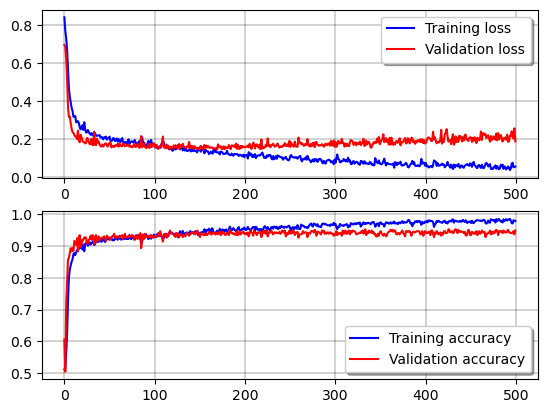

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

16/16 [==============================] - 0s 6ms/step


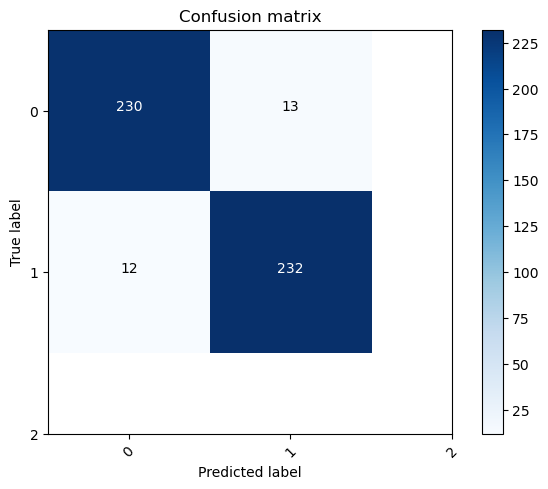

In [56]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [57]:
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
print(y_pred[:5])

16/16 [==============================] - 0s 5ms/step
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


真實y值

In [58]:
print(yval[:5])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


# 分類報告

In [59]:
def 勝率(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
勝率(yval,y_pred)

0.9486652977412731

In [60]:
from sklearn.metrics import classification_report 
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Hold       0.00      0.00      0.00         0
         BUY       0.95      0.95      0.95       243
        SELL       0.95      0.95      0.95       244

   micro avg       0.95      0.95      0.95       487
   macro avg       0.63      0.63      0.63       487
weighted avg       0.95      0.95      0.95       487
 samples avg       0.95      0.95      0.95       487



c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# plot error

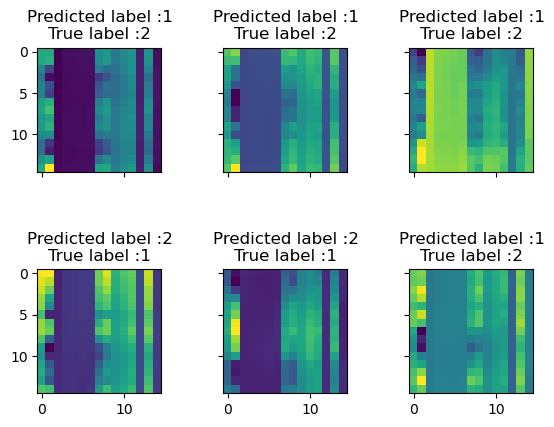

In [61]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

## 測試集預測

In [91]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))

2/2 [==============================] - 0s 4ms/step
40


# 預測結果

[*********************100%***********************]  1 of 1 completed


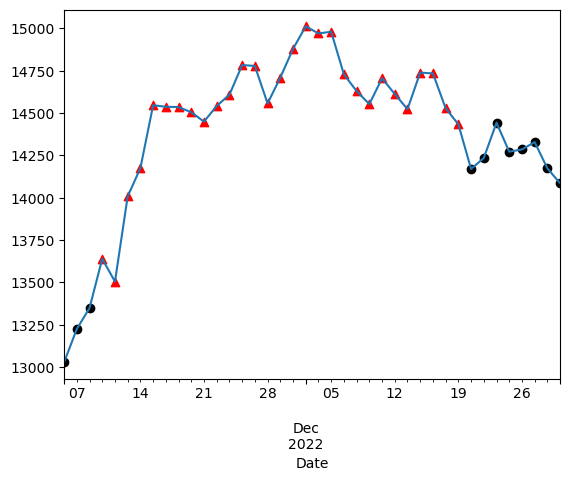

In [92]:
C = pd.DataFrame()
C['Close'] = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)['Close']
C['SIGNAL'] = 0
C = C.tail(len(answer))
C['SIGNAL'] = answer 
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

In [93]:
import pandas as pd
# Set the float_format option to not use scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(5)

2/2 [==============================] - 0s 3ms/step


,Close,HOLD%,BUY%,SELL%
Date,,,,
2022-12-23,14271.6299,0.0000,0.0000,1.0000
2022-12-26,14285.1299,0.0000,0.0000,1.0000
2022-12-27,14328.4297,0.0000,0.0001,0.9999
2022-12-28,14173.0996,0.0000,0.0000,1.0000
2022-12-29,14085.0195,0.0000,0.0000,1.0000


In [94]:
def 勝率(df):
  t = []
  for i,idx in enumerate(df.index):
    訊號 = np.argmax(df.iloc[i,-3:])
    if 訊號 == 1:#buy
      try:
        點差 = df.iloc[i+1,0] - df.iloc[i,0]
        if 點差>0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 2:#sell
      try:
        點差 = df.iloc[i,0] - df.iloc[i+1,0]
        if 點差<0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 0:#hold
      pass
  return np.mean(t)
#C['Close'].shift()-C['Close'],len(C['Close'].shift()-C['Close'])
勝率(df)

0.536697247706422

In [95]:
t = []
for i in range(len(C)):
  signal = np.argmax(C.iloc[i,-3:])
  if signal == 2:
    signal = -1
    t.append(signal)
  if signal == 1:
    signal = 1
    t.append(signal)
  if signal == 0:
    t.append(signal)
t,len(t)

([-1,
  -1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 40)

In [96]:
a = (C['Close'].shift()-C['Close']).values*t
平均獲利 = pd.Series((a>0)*a).dropna().mean()
平均損失 = pd.Series((a<0)*a).dropna().mean()
賠率 = 1-勝率(df)
print(勝率(df),平均獲利,賠率,平均損失)
分子 = 勝率(df)*平均獲利
分母 =  賠率*平均損失*-1
print(分子,分母)
盈虧比 = (分子)/(分母)
盈虧比

0.536697247706422 53.03049879807692 0.463302752293578 -81.56412760416667
28.461322749426603 37.78888480743502


0.7531665169390444

In [97]:
賠率

0.463302752293578

# save model

In [98]:
model.save('model.h5')
del model

In [99]:
from keras.models import load_model
model = load_model('model.h5')
predict = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [100]:
predict[-5:]

array([[0.        , 0.00000017, 0.9999999 ],
       [0.        , 0.00000032, 0.99999964],
       [0.        , 0.00008526, 0.99991477],
       [0.        , 0.00000001, 1.        ],
       [0.        , 0.00000008, 0.9999999 ]], dtype=float32)